Import Important libraries

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Read the data

In [26]:
df = pd.read_csv("car.csv")
df.head()

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,selling_price
0,BMW,2014,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,450000
1,Honda,2014,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,370000
2,Toyota,2006,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,158000
3,Ford,2010,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,225000
4,Honda,2007,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,130000


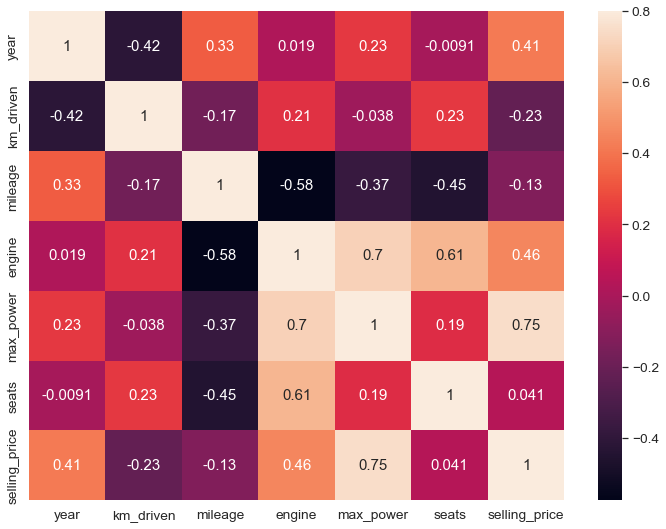

In [27]:
plt.figure(figsize=(12,9))
sns.heatmap(df.corr(), vmax=0.8, annot=True);

In [28]:
# df = df.drop(df.columns[[0, 3, 4, 5, 6]], axis=1)
# del df['mileage']
df

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,selling_price
0,BMW,2014,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,450000
1,Honda,2014,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,370000
2,Toyota,2006,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,158000
3,Ford,2010,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,225000
4,Honda,2007,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,130000
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Ford,2013,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0,320000
8124,Nissan,2007,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,5.0,135000
8125,BMW,2009,120000,Diesel,Individual,Manual,First Owner,19.30,1248.0,73.90,5.0,382000
8126,Ford,2013,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70.00,5.0,290000


In [29]:
df = pd.get_dummies(data=df)
df_reordered = df.drop(columns=['selling_price'])

# Append the 'selling_price' column to the end
df_reordered['selling_price'] = df['selling_price']
df = df_reordered
df
features_titles = df.columns

In [30]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df.iloc[:,0:5] = scaler.fit_transform(df.iloc[:, 0:5])
df

,year,km_driven,mileage,engine,max_power,seats,name_BMW,name_Ford,name_Honda,name_Nissan,...,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner,selling_price
0,0.837838,0.061640,0.557143,0.209396,0.185000,5.0,1,0,0,0,...,1,0,0,1,1,0,0,0,0,450000
1,0.837838,0.050837,0.503333,0.293289,0.258800,5.0,0,0,1,0,...,1,0,0,1,0,0,1,0,0,370000
2,0.621622,0.059310,0.421429,0.292953,0.195000,5.0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,158000
3,0.729730,0.053803,0.547619,0.259060,0.225000,5.0,0,1,0,0,...,1,0,0,1,1,0,0,0,0,225000
4,0.648649,0.050837,0.383333,0.226174,0.220500,5.0,0,0,1,0,...,1,0,0,1,1,0,0,0,0,130000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,0.810811,0.046601,0.440476,0.192282,0.207125,5.0,0,1,0,0,...,1,0,0,1,1,0,0,0,0,320000
8124,0.648649,0.050414,0.400000,0.291611,0.275000,5.0,0,0,0,1,...,1,0,0,1,0,1,0,0,0,135000
8125,0.702703,0.050837,0.459524,0.209396,0.184750,5.0,1,0,0,0,...,1,0,0,1,1,0,0,0,0,382000
8126,0.810811,0.010591,0.561190,0.259060,0.175000,5.0,0,1,0,0,...,1,0,0,1,1,0,0,0,0,290000


Split data to Features(x) and label(y)

In [31]:
# x = df.iloc[:, 2].values # Features: Extracting all rows for all columns except the last one (label) 
x = df.iloc[:, :-1].values # Features: Extracting all rows for all columns except the last one (label) 
y = df.iloc[:, -1].values # Label: Extracting all rows for the last column (label)
print('col   null count')
pd.DataFrame(x).isnull().sum() # Display columns with missing data 

col   null count


0       0
1       0
2     221
3     221
4     216
5     221
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
dtype: int64

Take care of Missing data

In [32]:
from sklearn.impute import SimpleImputer

# missing_cols = range(7,11) 
missing_cols = range(2,6) 
# missing_cols = range(5,9) 

most_freq_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
most_freq_imputer.fit(x[:, missing_cols])
x[:, missing_cols] = most_freq_imputer.transform(x[:, missing_cols])
print('col   null count')
pd.DataFrame(x).isnull().sum()

col   null count


0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
dtype: int64

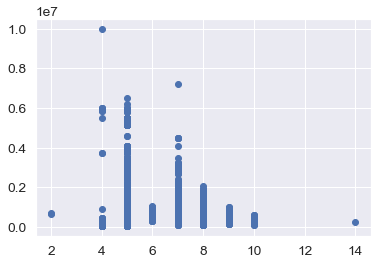

In [33]:
plt.scatter(df['seats'], df['selling_price']);
plt.show()


Encoding the Independent Variable

In [34]:
# df_temp = pd.DataFrame(np.concatenate)
# df_temp
data = pd.concat([pd.DataFrame(x),pd.DataFrame(y)], axis=1)
data

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,0
0,0.837838,0.061640,0.557143,0.209396,0.185000,5.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,450000
1,0.837838,0.050837,0.503333,0.293289,0.258800,5.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,370000
2,0.621622,0.059310,0.421429,0.292953,0.195000,5.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,158000
3,0.729730,0.053803,0.547619,0.259060,0.225000,5.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,225000
4,0.648649,0.050837,0.383333,0.226174,0.220500,5.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,130000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,0.810811,0.046601,0.440476,0.192282,0.207125,5.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,320000
8124,0.648649,0.050414,0.400000,0.291611,0.275000,5.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,135000
8125,0.702703,0.050837,0.459524,0.209396,0.184750,5.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,382000
8126,0.810811,0.010591,0.561190,0.259060,0.175000,5.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,290000


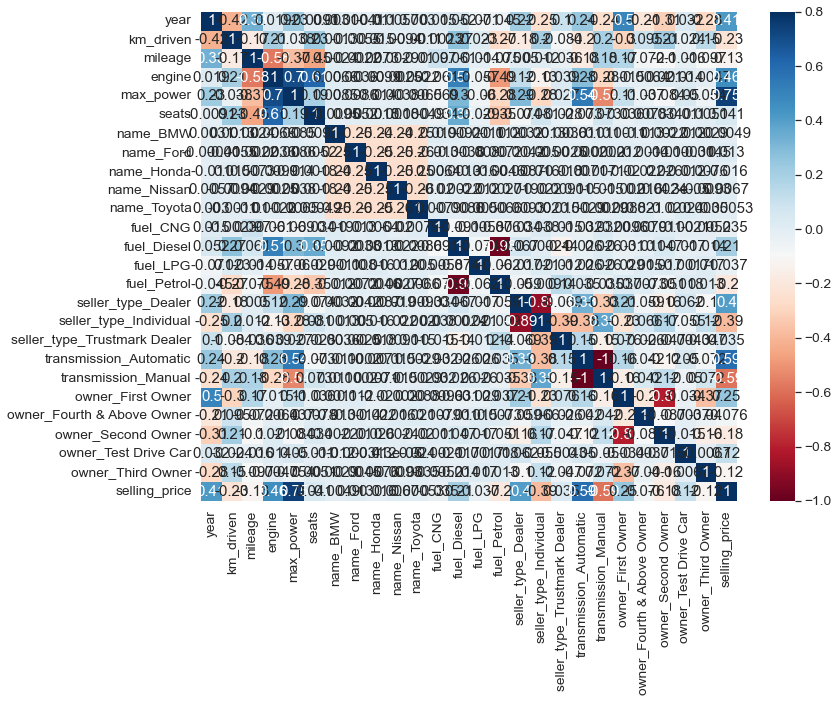

In [35]:
corrmat = df.corr()
plt.subplots(figsize = (12,9))
sns.heatmap(corrmat,annot=True, vmax=0.8, cmap='RdBu');

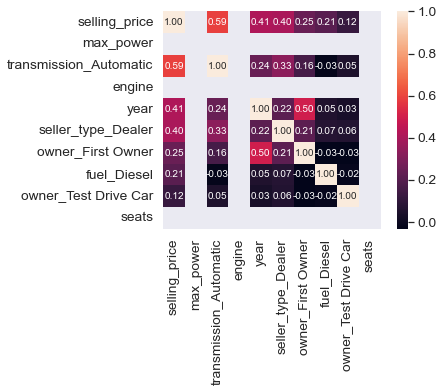

In [36]:
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'selling_price')['selling_price'].index
cm = np.corrcoef(df[cols].values.T)
sns.set_theme(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

Splitting the dataset into training set and test set

In [37]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y ,test_size=0.2, random_state=9)

Training the Multiple Linear Regression model on the Training set

In [38]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
x_poly_train = poly.fit_transform(x_train)
x_poly_test = poly.fit_transform(x_test)

In [39]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor2 = LinearRegression()
regressor.fit(x_poly_train, y_train)
regressor2.fit(x_train,y_train)

LinearRegression()

In [40]:
print(x_train.shape)
print(y_train.shape)
training_acc = np.ceil(regressor.score(x_poly_train, y_train) * 100)
print("The Training Accuracy = ", training_acc, "%")

(6502, 25)
(6502,)
The Training Accuracy =  92.0 %


Predicting the Test set results

In [42]:
y_poly_pred = regressor.predict(x_poly_test)
y_pred = regressor2.predict(x_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_poly_pred.reshape(-1,1), y_test.reshape(-1,1)) , axis=1))

[[ 735610.  751000.]
 [1937138. 2000000.]
 [ 256970.  250000.]
 ...
 [ 229338.  110000.]
 [ 185130.  290000.]
 [  74690.  125000.]]


In [43]:
print(x_poly_test.shape)
print(y_test.shape)
testing_acc = np.ceil(regressor.score(x_poly_test, y_test) * 100)
print("The Testing_acc Accuracy = ", testing_acc, "%")

(1626, 351)
(1626,)
The Testing_acc Accuracy =  92.0 %


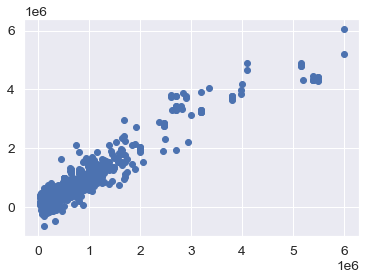

In [44]:
plt.scatter(y_test, y_poly_pred)



# plt.scatter( c='r')

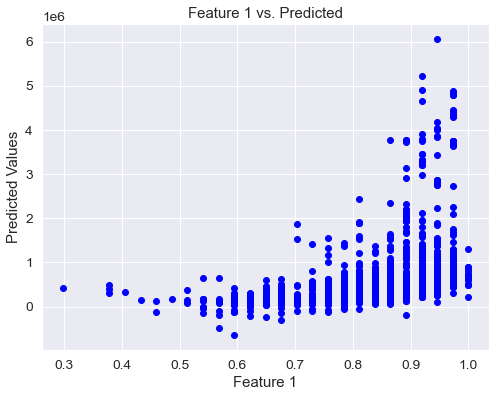

In [45]:
feature_index = 0  # Change this index based on which feature you want to compare

feature_values = [sample[feature_index] for sample in x_test]

plt.figure(figsize=(8, 6))
plt.scatter(feature_values, y_poly_pred, color='blue')
plt.xlabel('Feature {}'.format(feature_index + 1))
plt.ylabel('Predicted Values')
plt.title('Feature {} vs. Predicted'.format(feature_index + 1))
plt.show()

In [46]:
x
x_test


array([[0.95, 0.02, 0.63, ..., 0.  , 0.  , 0.  ],
       [0.89, 0.03, 0.46, ..., 0.  , 0.  , 0.  ],
       [0.76, 0.03, 0.5 , ..., 1.  , 0.  , 0.  ],
       ...,
       [0.76, 0.02, 0.41, ..., 0.  , 0.  , 0.  ],
       [0.68, 0.05, 0.29, ..., 1.  , 0.  , 0.  ],
       [0.68, 0.03, 0.45, ..., 0.  , 0.  , 0.  ]])

Coefficients: [ 1.14e+06 -2.27e+06  5.46e+05  1.88e+05  5.23e+06 -3.07e+04 -1.44e+04
  1.31e+04 -6.00e+03 -2.39e+03  9.68e+03 -8.61e+02 -4.42e+04  1.43e+05
 -9.78e+04  1.96e+05 -4.43e+04 -1.52e+05  2.37e+05 -2.37e+05 -4.12e+05
 -4.00e+05 -4.57e+05  1.68e+06 -4.13e+05]
Intercept: -892821.5710256315


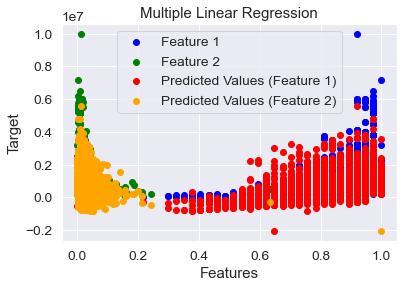

In [54]:
slopes = regressor2.coef_
intercept = regressor2.intercept_

# Print the coefficients and intercept
print("Coefficients:", slopes)
print("Intercept:", intercept)

# print(x_train.shape)
# print(x_train.shape)
# Generate predicted values
y_pred = regressor2.predict(x_train)


# Plot the actual data points
plt.scatter(x_train[:, 0], y_train, color='blue', label='Feature 1')
plt.scatter(x_train[:, 1], y_train, color='green', label='Feature 2')

# Plot the predicted values
plt.scatter(x_train[:, 0], y_pred, color='red', label='Predicted Values (Feature 1)')
plt.scatter(x_train[:, 1], y_pred, color='orange', label='Predicted Values (Feature 2)')

# Add labels and legend
plt.xlabel('Features')
plt.ylabel('Target')
plt.title('Multiple Linear Regression')
plt.legend()

# Show plot
plt.show()

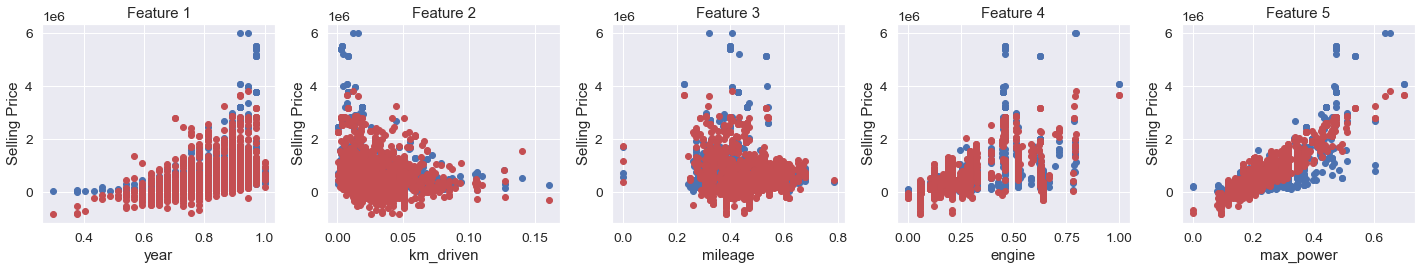

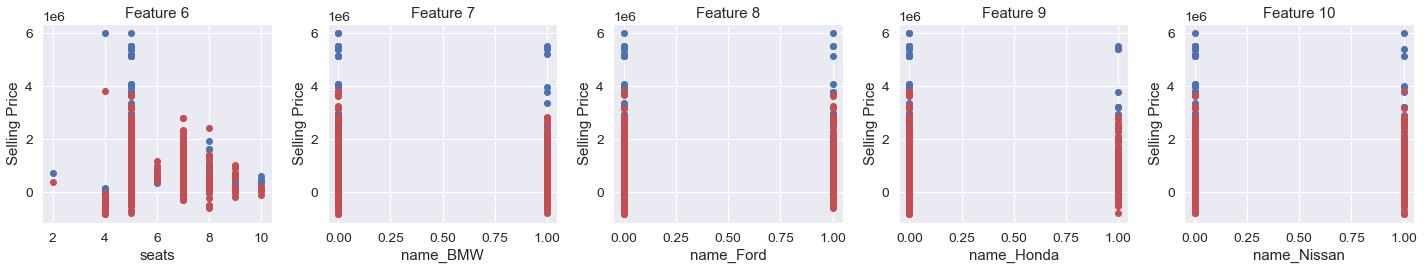

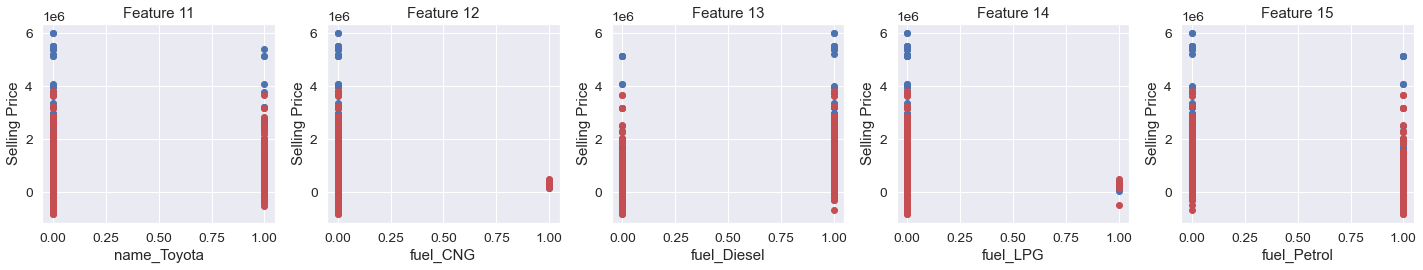

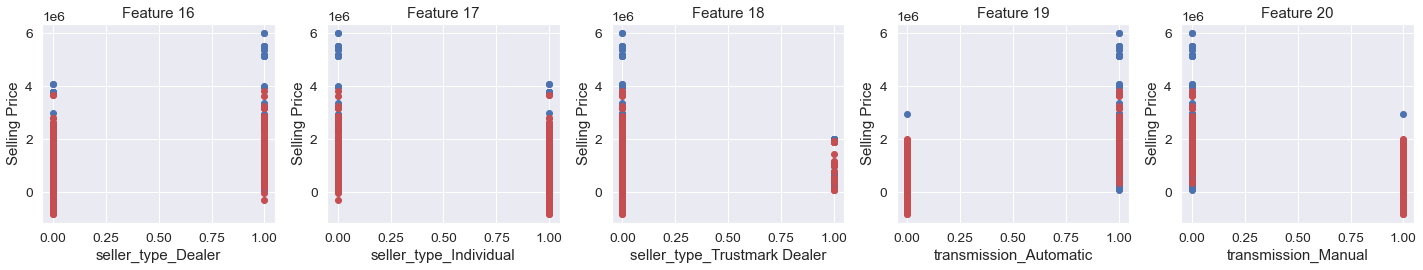

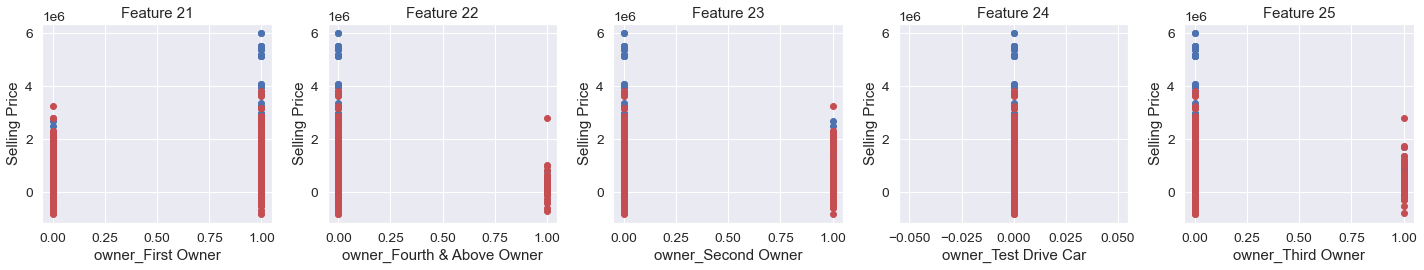

In [47]:
num_plots = x_test.shape[1]
row_nums = 5
for i in range(int(np.ceil(num_plots/row_nums))):
    fig, axes = plt.subplots(1, row_nums, figsize=(20, 4)) 
    for j in range(row_nums):
        index = i * row_nums + j
        if index >= num_plots:
            break
        axes[j].scatter(x_test[:, index], y_test)
        axes[j].scatter(x_test[:, index], y_pred, c='r')
        axes[j].set_title(f'Feature {index+1}')
        axes[j].set_xlabel(features_titles[index]) # add the name of feature
        axes[j].set_ylabel('Selling Price') # add the name of feature
        
    plt.tight_layout()
    plt.show()

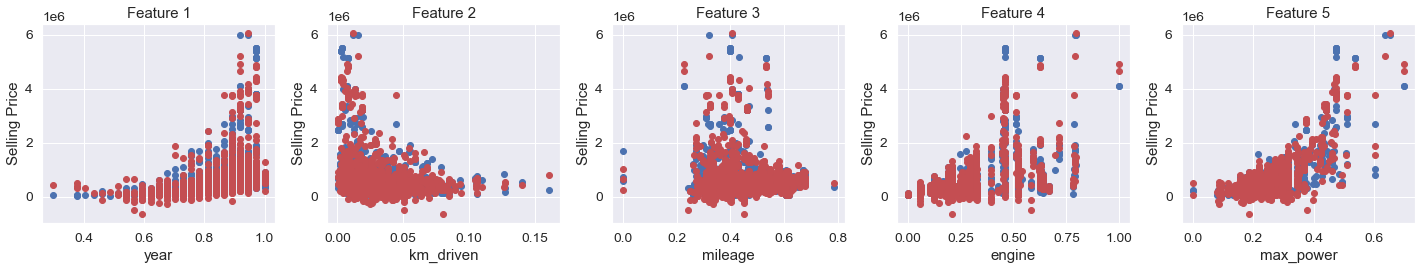

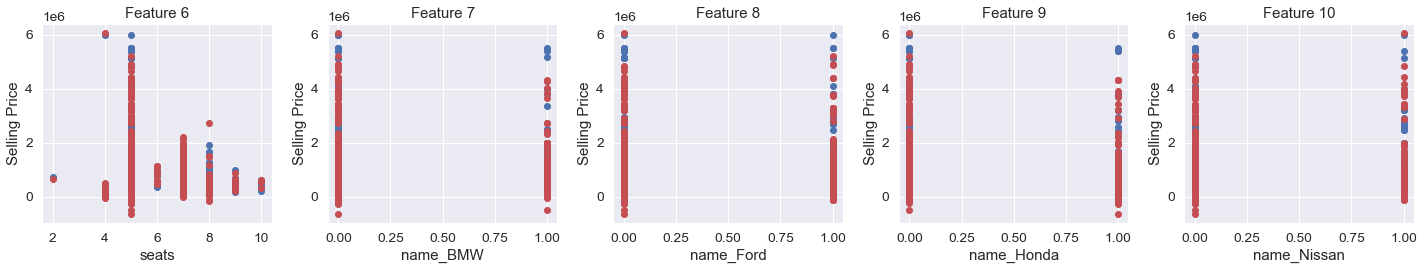

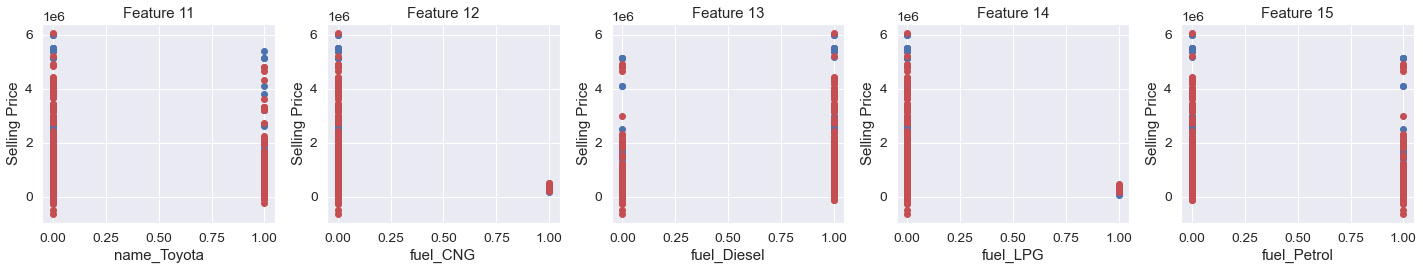

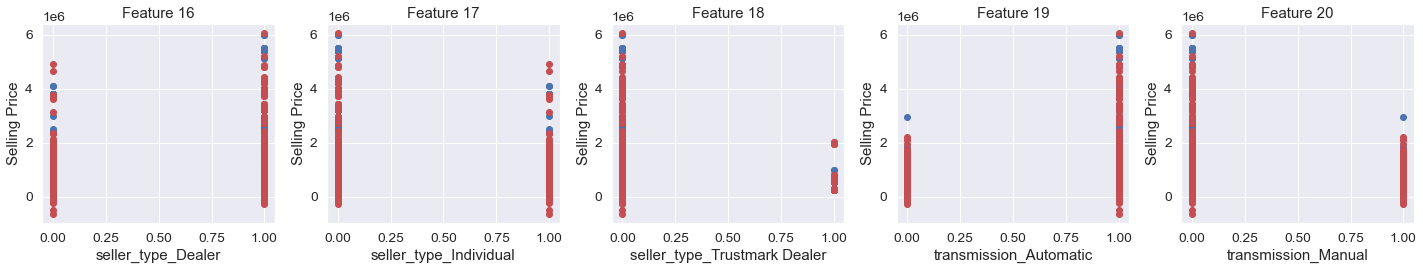

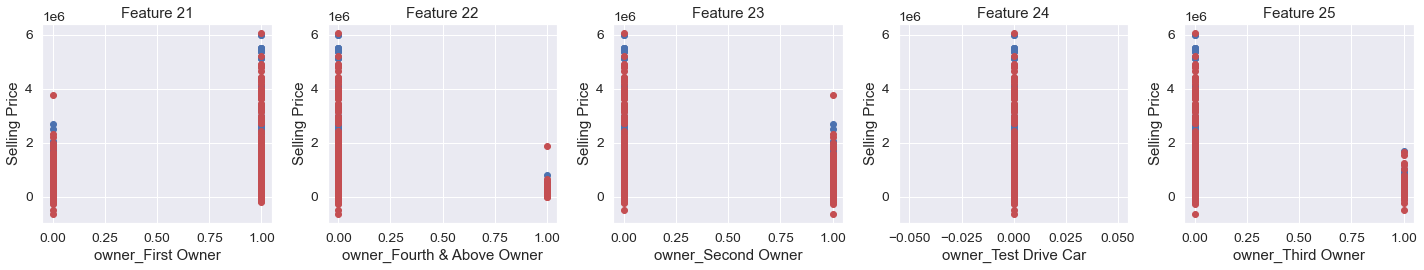

In [48]:
num_plots = x_test.shape[1]
row_nums = 5
for i in range(int(np.ceil(num_plots/row_nums))):
    fig, axes = plt.subplots(1, row_nums, figsize=(20, 4)) 
    for j in range(row_nums):
        index = i * row_nums + j
        if index >= num_plots:
            break
        axes[j].scatter(x_test[:, index], y_test)
        axes[j].scatter(x_test[:, index], y_poly_pred, c='r')
        axes[j].set_title(f'Feature {index+1}')
        axes[j].set_xlabel(features_titles[index]) # add the name of feature
        axes[j].set_ylabel('Selling Price') # add the name of feature
        
    plt.tight_layout()
    plt.show()

Getting the final linear regression equation with the values of the coefficients

In [49]:
print(regressor.coef_)
print(regressor.intercept_)

[ 1.40e+13  1.89e+16  5.41e+16  4.22e+15 -1.61e+16 -3.70e+16 -2.38e+16
  2.56e+15  3.67e+14 -7.02e+15  7.14e+14 -8.92e+15 -3.46e+15 -6.13e+15
 -3.85e+15  2.15e+15 -7.31e+13  2.19e+15 -9.75e+13  2.51e+13 -1.80e+15
 -2.23e+15  5.24e+14 -5.53e+14 -3.27e+14  8.37e+14  1.07e+06 -6.87e+06
 -9.44e+05 -9.16e+05  1.94e+07 -2.54e+05  7.28e+15  7.28e+15  7.28e+15
  7.28e+15  7.28e+15  2.13e+15  2.13e+15  2.13e+15  2.13e+15 -4.85e+15
 -4.85e+15 -4.85e+15 -2.46e+15 -2.46e+15 -2.10e+16 -2.10e+16 -2.10e+16
  3.95e+14 -2.10e+16  6.45e+05 -1.09e+06  6.80e+06 -2.11e+07 -3.64e+05
 -6.99e+15 -6.99e+15 -6.99e+15 -6.99e+15 -6.99e+15 -9.90e+15 -9.90e+15
 -9.90e+15 -9.90e+15 -1.19e+16 -1.19e+16 -1.19e+16 -1.82e+16 -1.82e+16
 -7.08e+15 -7.08e+15 -7.08e+15 -7.08e+15 -7.08e+15  2.02e+06  4.63e+05
  3.30e+06  1.62e+04  2.05e+14  2.05e+14  2.05e+14  2.05e+14  2.05e+14
  2.06e+15  2.06e+15  2.06e+15  2.06e+15 -3.10e+15 -3.10e+15 -3.10e+15
 -2.98e+15 -2.98e+15 -4.10e+14 -4.10e+14 -4.10e+14  1.25e+14 -4.10e+14
  7.15